Test out some of the data with the ChartAssistant/ChartSFT(?) dataset.

In [1]:
base_dir = '/Users/jnaiman/Downloads/tmp/JCDL2025/other_datasets/ChartAssistant/'

In [2]:
import pandas as pd
from glob import glob

In [3]:
file = base_dir + 'chart_upload.json'

In [27]:
df_in = pd.read_json(file)

In [69]:
# create image type
df = df_in.copy()
image_type = []
image_link = []
chart_type = []
for i in range(len(df)):
    img = df.iloc[i]['image']
    img_link = img.replace('/mnt/petrelfs/share_data/mengfanqing1/mengfanqing', '')
    img_link = img_link.replace('/mnt/petrelfs/mengfanqing','')
    img_link = img_link.replace('/mnt/petrelfs/share_data/luquanfeng','')
    img_link = img_link.replace('/mnt/petrelfs/share_data', '')
    if 'arxiv/' in img:
        image_type.append('arxiv')
        chart_type.append('unknown')
        #import sys; sys.exit()
    elif 'mathqa/' in img:
        image_type.append('mathqa')
        #print(img)
        chart_type.append('unknown')
    elif 'referqa/' in img:
        image_type.append('referqa')
        #print(img)
        chart_type.append(img.split('_')[-1].split('.png')[0])
    elif 'unichart' in img.lower():
        image_type.append('unichart')
        #print(img)
        chart_type.append('unknown')
    elif 'ScigraphQA' in img:
        image_type.append('scigraphqa')
        #print(img)
        chart_type.append('unknown')
    elif 'plotqa' in img.lower():
        image_type.append('plotqa')
        #print(img)
        chart_type.append('unknown')
    elif 'chart-to-text' in img.lower():
        image_type.append('chart-to-text')
        #print(img)
        chart_type.append('unknown')
    elif 'chart2text' in img.lower():
        image_type.append('chart2text')
        chart_type.append('unknown')
    elif 'vistext' in img.lower():
        image_type.append('vistext')
        #print(img)
        chart_type.append('unknown')
    elif 'referring_box' in img.lower():
        image_type.append('referring_box')
        #print(img)
        chart_type.append('unknown')
    elif 'chartqa' in img.lower():
        image_type.append('chartqa')
        #print(img)
        chart_type.append('unknown')
    elif 'chartsummdata' in img.lower():
        image_type.append('chartsummdata')
        #print(img)
        chart_type.append('unknown')
    elif 'opencqa' in img.lower():
        image_type.append('opencqa')
        #print(img)
        chart_type.append('unknown')
    elif 'table_ocr' in img.lower():
        image_type.append('tableocr')
        #print(img)
        ctype = img.split('/img/')[-1].split('.png')[0]
        ind = ctype.index('_') + 1
        chart_type.append(ctype[ind:])
    elif '/dataset/' in img:
        image_type.append('unknown dataset')
        chart_type.append(img.split('/')[-2])
    else:
        print('img:', img)
        import sys; sys.exit()
    image_link.append(img_link)

    # if 'stack' in chart_type[-1]:
    #     import sys; sys.exit()

    #image_type.append(df.iloc[i]['image'].split('/')[-2])

df['image type'] = image_type
df['image link'] = image_link
df['chart type'] = chart_type

In [70]:
#chart_type[-1]

In [71]:
#img

In [72]:
df['image type'].value_counts()

image type
scigraphqa         659309
plotqa             590090
arxiv              431673
mathqa             274724
referqa            151020
referring_box      151020
unichart           120568
chartsummdata       75927
chartqa             75818
chart-to-text       38854
vistext             19938
opencqa             19695
tableocr            15233
chart2text           6875
unknown dataset      2324
Name: count, dtype: int64

<Axes: xlabel='image type'>

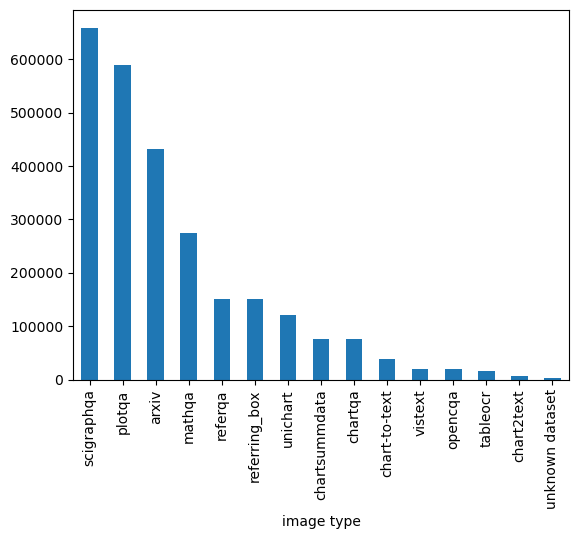

In [73]:
df['image type'].value_counts().plot(kind='bar')

In [74]:
df['chart type'].value_counts()

chart type
unknown             2464491
box                   61581
arrow                 56855
box1                  16433
arrow1                16151
pie                    9743
nightingale_rose       5490
hbar_categorical        462
vbar_categorical        412
hbar_stack              399
vbar_stack              390
dot_line                244
line                    211
line_area               206
Name: count, dtype: int64

In [75]:
df[df['chart type'] == 'nightingale_rose']

,image,conversations,image type,image link,chart type
358,/mnt/petrelfs/share_data/table_ocr/pie/img/25_...,"[{'from': 'human', 'value': 'convert this char...",tableocr,/table_ocr/pie/img/25_nightingale_rose.png,nightingale_rose
1172,/mnt/petrelfs/share_data/table_ocr/pie/img/155...,"[{'from': 'human', 'value': 'convert this char...",tableocr,/table_ocr/pie/img/15568_nightingale_rose.png,nightingale_rose
1189,/mnt/petrelfs/share_data/table_ocr/pie/img/114...,"[{'from': 'human', 'value': 'convert this char...",tableocr,/table_ocr/pie/img/11499_nightingale_rose.png,nightingale_rose
1342,/mnt/petrelfs/share_data/table_ocr/pie/img/332...,"[{'from': 'human', 'value': 'convert this char...",tableocr,/table_ocr/pie/img/33276_nightingale_rose.png,nightingale_rose
1743,/mnt/petrelfs/share_data/table_ocr/pie/img/306...,"[{'from': 'human', 'value': 'convert this char...",tableocr,/table_ocr/pie/img/30626_nightingale_rose.png,nightingale_rose
...,...,...,...,...,...
2631259,/mnt/petrelfs/share_data/table_ocr/pie/img/193...,"[{'from': 'human', 'value': 'convert this char...",tableocr,/table_ocr/pie/img/19304_nightingale_rose.png,nightingale_rose
2631913,/mnt/petrelfs/share_data/table_ocr/pie/img/342...,"[{'from': 'human', 'value': 'convert this char...",tableocr,/table_ocr/pie/img/34250_nightingale_rose.png,nightingale_rose
2632010,/mnt/petrelfs/share_data/table_ocr/pie/img/348...,"[{'from': 'human', 'value': 'convert this char...",tableocr,/table_ocr/pie/img/34850_nightingale_rose.png,nightingale_rose
2632565,/mnt/petrelfs/share_data/table_ocr/pie/img/201...,"[{'from': 'human', 'value': 'convert this char...",tableocr,/table_ocr/pie/img/2016_nightingale_rose.png,nightingale_rose


In [68]:
# for i,d in df[df['image type'] == 'unknown dataset'].iterrows():
#     print(d['image'])

In [39]:
d[1]

image            /mnt/petrelfs/share_data/luquanfeng/dataset/va...
conversations    [{'from': 'human', 'value': 'convert this char...
image type                                         unknown dataset
image link                  /dataset/val/hbar_categorical/4662.png
Name: 291, dtype: object

In [7]:
df.iloc[0]['conversationsa']

[{'from': 'human',
  'value': 'Please use commandline to solve the math question: What is the difference between the highest and the second highest % of children under 5 who received treatment of Malaria ?'},
 {'from': 'gpt',
  'value': "{'step1': {'func1': 'select', 'arg1': 'malaria', 'output1': ['10.000', '0.900']}, 'step2': {'func2': 'numpy.sort', 'arg2': 'output1', 'output2': 'sorted_arr'}, 'step3': {'func3': 'getitem', 'arg3': ['sorted_arr', '-1'], 'output3': 'maximum'}, 'step4': {'func4': 'numpy.delete', 'arg4': ['sorted_arr', '-1'], 'output4': 'new_arr'}, 'step5': {'func5': 'getitem', 'arg5': ['new_arr', '-1'], 'output5': 'second_maximum'}, 'step6': {'func6': 'numpy.subtract', 'arg6': ['maximum', 'second_maximum'], 'output6': 'diff'}}"}]

In [9]:
df.iloc[0]['image'].split('/')[-2]

'mathqa'